<a href="https://colab.research.google.com/github/Jellyjellyjinjin/Daycon_mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
from numpy import expand_dims
from keras.layers import Dense, Flatten,Conv2D,MaxPool2D,Dropout,Input
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

<ipython-input-1-17ef75b23a8b>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [ ]:
train2 = train.drop(['id', 'digit', 'letter'], axis=1).values
train2 = train2.reshape(-1, 28, 28, 1)
train2 = train2/255

def one_hot_encoder(x):
    y = np.zeros((len(x), len(np.unique(x))))
    for i, num in enumerate(x):
        y[i][num] = 1
    return y

y_target = one_hot_encoder(train['digit'])

In [ ]:
x_train,x_valid,y_train, y_valid = train_test_split(train2,y_target, test_size = 0.1)

In [ ]:
idg = ImageDataGenerator(
    width_shift_range = (-1,1),
    height_shift_range = (-1,1),
    horizontal_flip = False,
    vertical_flip = False)

idg2 = ImageDataGenerator()

In [ ]:
train_generator = idg.flow(x_train,y_train)
valid_generator = idg2.flow(x_valid,y_valid)

In [ ]:
def build_model (train):
  inputs = tf.keras.layers.Input(train.shape[1:])

  output = Conv2D(filters = 16, kernel_size = 3,activation = 'relu', padding = 'same')(inputs)
  output = BatchNormalization()(output)

  output = Conv2D(filters = 128, kernel_size = 5,activation = 'relu', padding = 'same')(output)
  output = BatchNormalization()(output)
  output = Conv2D(filters = 128, kernel_size = 2,activation = 'relu', padding = 'same')(output)
  output = BatchNormalization()(output)
  output = Conv2D(filters = 128, kernel_size = 2,activation = 'relu', padding = 'valid')(output)
  output = MaxPool2D(strides = (2,2))(output)
  output = Dropout(0.3)(output)

  output = BatchNormalization()(output)
  output = Conv2D(filters = 256, kernel_size = 2,activation = 'relu', padding = 'same')(output)
  output = BatchNormalization()(output)
  output = Conv2D(filters = 256, kernel_size = 2,activation = 'relu', padding = 'same')(output)
  output = MaxPool2D(strides = (2,2))(output)
  output = Dropout(0.3)(output)


  output = Flatten()(output)
  output = BatchNormalization()(output)
  output = Dense(1000, activation = 'relu')(output)
  output = BatchNormalization()(output)
  output = Dropout(0.5)(output)
  output = Dense(256, activation = 'relu')(output)
  output = BatchNormalization()(output)
  output = Dropout(0.5)(output)
  output = Dense(10, activation = 'softmax')(output)

  model = tf.keras.models.Model(inputs=inputs, outputs= output)

  model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['acc'])
  return model



In [ ]:
model = build_model(x_train)


In [ ]:
history = model.fit_generator(train_generator, epochs = 30,
                    validation_data= valid_generator
                    )

Epoch 1/30
58/58 [==============================] - 9s 39ms/step - loss: 2.8883 - acc: 0.2355 - val_loss: 5.2819 - val_acc: 0.0927
Epoch 2/30
58/58 [==============================] - 2s 28ms/step - loss: 2.0847 - acc: 0.3755 - val_loss: 7.0698 - val_acc: 0.0927
Epoch 3/30
58/58 [==============================] - 2s 28ms/step - loss: 1.7031 - acc: 0.4639 - val_loss: 11.8447 - val_acc: 0.0927
Epoch 4/30
58/58 [==============================] - 2s 28ms/step - loss: 1.4268 - acc: 0.5399 - val_loss: 7.0823 - val_acc: 0.0927
Epoch 5/30
58/58 [==============================] - 2s 27ms/step - loss: 1.2207 - acc: 0.6077 - val_loss: 7.1739 - val_acc: 0.0927
Epoch 6/30
58/58 [==============================] - 2s 33ms/step - loss: 1.1081 - acc: 0.6468 - val_loss: 14.2892 - val_acc: 0.0927
Epoch 7/30
58/58 [==============================] - 2s 29ms/step - loss: 0.9960 - acc: 0.6696 - val_loss: 10.0517 - val_acc: 0.0927
Epoch 8/30
58/58 [==============================] - 2s 28ms/step - loss: 0.9144 

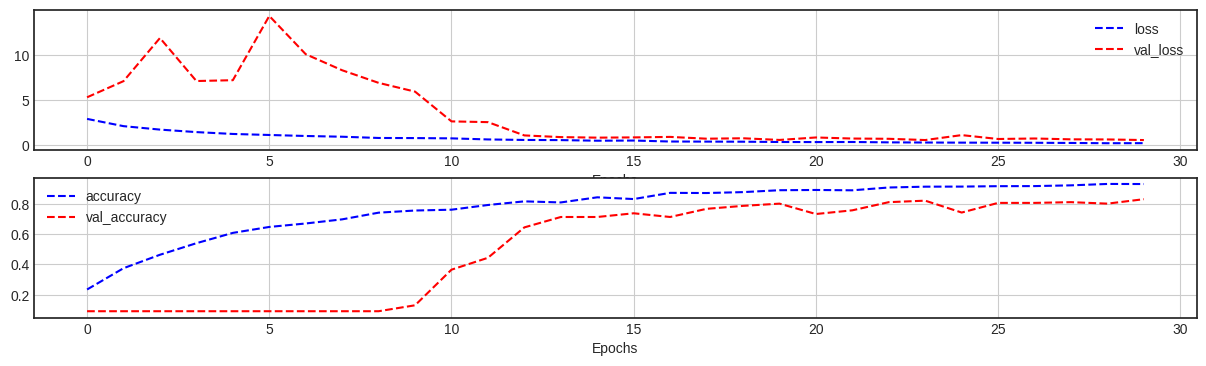

In [ ]:
fig = plt.figure(figsize = (15,4))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['loss'], 'b--', label = 'loss')
ax1.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()


ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['acc'], 'b--', label = 'accuracy')
ax2.plot(history.history['val_acc'], 'r--', label = 'val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

In [ ]:
sub = pd.read_csv('./submission.csv')
test2 = test.drop(['id','letter'],1)
test2 = test2.values
test2 = test2.reshape(-1,28,28,1)
test2 = test2/255.0

In [ ]:
sub['digit'] = np.argmax(model.predict(test2), axis=1)
sub.head() # 파일 확인

640/640 [==============================] - 4s 6ms/step


,id,digit
0,2049,6
1,2050,0
2,2051,8
3,2052,0
4,2053,3


In [ ]:
sub.to_csv('daycon1.csv', index=False)